In [ ]:
import pandas as pd
import numpy as np

# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

# 선형회귀분석 모델
import statsmodels.formula.api as smf
# 회귀분석의 정규성 확인: qqplot, add_constant
from statsmodels.api import qqplot, add_constant
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 학습용/평가용 데이터 분리: train/test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가 함수
from sklearn.metrics import r2_score
# 선형 모델
from sklearn.linear_model import Ridge, Lasso, ElasticNet


# 평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor
# 예측/회귀 Random Forest
from sklearn.ensemble import RandomForestRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rc
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

font = fm.FontProperties(fname=fontpath, size=9)


# 그래프에 retina display 적용

%config InlineBackend.figure_format = 'retina'

# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import platform

# [1] 한글 폰트 설정 (운영체제별로 처리)
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'    # macOS
else:
    plt.rcParams['font.family'] = 'NanumGothic'     # Linux

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# [1] 한글 폰트 설정 (운영체제별로 처리)
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
# elif platform.system() == 'Darwin':
#     plt.rcParams['font.family'] = 'AppleGothic'    # macOS
# else:
#     plt.rcParams['font.family'] = 'NanumGothic'     # Linux

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')


In [ ]:
# 기본 라이브러리
import pandas as pd
import numpy as np

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

# # 한글 폰트 깨짐 방지 (나눔고딕)
# import matplotlib
# matplotlib.rc('font', family='NanumGothic')  # 여기 수정
# plt.rcParams['axes.unicode_minus'] = False

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기
df = pd.read_csv('/content/df_clean (2).csv', parse_dates=['OrderDT', 'DeliveryDT'])

# 확인
print("✅ 데이터 shape:", df.shape)
print("✅ 컬럼 목록:\n", df.columns)
df.head()


✅ 데이터 shape: (856727, 32)
✅ 컬럼 목록:
 Index(['idUser', 'Gender', 'Age', 'AgeGroup', 'FamilyCount', 'MemberYN',
       'idOrder', 'OrderDT', 'OrderMonth', 'OrderDay', 'OrderHour',
       'OrderMinute', 'OrderSecond', 'ItemCode', 'ItemLargeName',
       'ItemMiddleName', 'ItemSmallName', 'ItemName', 'Price', 'PriceYear',
       'PriceMin', 'PriceMax', 'DeliveryDT', 'Deli_Year', 'Deli_Month',
       'Deli_Day', 'Deli_Hour', 'Deli_Minute', 'Deli_Second', 'Deli_Duration',
       'Deli_Hours', 'IsMorningDelivery'],
      dtype='object')


,idUser,Gender,Age,AgeGroup,FamilyCount,MemberYN,idOrder,OrderDT,OrderMonth,OrderDay,...,DeliveryDT,Deli_Year,Deli_Month,Deli_Day,Deli_Hour,Deli_Minute,Deli_Second,Deli_Duration,Deli_Hours,IsMorningDelivery
0,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,1,6,...,2022-01-07 06:24:00,2022,1,7,6,24,0,0 days 13:16:00,13.266667,1
1,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,1,6,...,2022-01-07 06:24:00,2022,1,7,6,24,0,0 days 13:16:00,13.266667,1
2,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,1,6,...,2022-01-07 06:24:00,2022,1,7,6,24,0,0 days 13:16:00,13.266667,1
3,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,1,6,...,2022-01-07 06:24:00,2022,1,7,6,24,0,0 days 13:16:00,13.266667,1
4,U10001,여성,26,20대,2,Y,U10001-O2022-1003,2022-01-13 16:50:00,1,13,...,2022-01-14 06:28:00,2022,1,14,6,28,0,0 days 13:38:00,13.633333,1


# 월 단위 추출
df['OrderMonth'] = df['OrderDT'].dt.to_period('M')  # Period 타입

# 월별 매출 합계
monthly_sales = df.groupby('OrderMonth')['Price'].sum()

# 시각화
plt.figure(figsize=(15, 5))
monthly_sales.plot(marker='o')
plt.title('📈 월별 매출 추이')
plt.xlabel('주문월')
plt.ylabel('매출 (원)')
plt.grid(True)
plt.tight_layout()
plt.show()


## 시간대별 매출패턴

## 요일별 매출 비교 (2030 vs 4060)

In [ ]:
df_unique = df.drop_duplicates(subset=['idUser', 'OrderDT'])

print(df_unique)

#df = df_unique

        idUser Gender  Age AgeGroup  FamilyCount MemberYN            idOrder  \
0       U10001     여성   26      20대            2        Y  U10001-O2022-1002   
4       U10001     여성   26      20대            2        Y  U10001-O2022-1003   
8       U10001     여성   26      20대            2        Y  U10001-O2022-1004   
12      U10001     여성   26      20대            2        Y  U10001-O2022-1005   
19      U10001     여성   26      20대            2        Y  U10001-O2022-1006   
...        ...    ...  ...      ...          ...      ...                ...   
856697  U13000     여성   30      30대            1        N  U13000-O2024-1013   
856701  U13000     여성   30      30대            1        N  U13000-O2024-1007   
856710  U13000     여성   30      30대            1        N  U13000-O2024-1014   
856714  U13000     여성   30      30대            1        N  U13000-O2024-1015   
856720  U13000     여성   30      30대            1        N  U13000-O2024-1008   

                   OrderDT  OrderMonth 

In [ ]:
from datetime import datetime, timedelta

df["OrderDT_date"] = pd.to_datetime(df["OrderDT"])

def dateweek(x):

    return x.strftime("%Y:%m:%d:%H:%M:%S")

df["OrderDT_Formatted"] = df["OrderDT_date"].apply(dateweek)

print(df["OrderDT_Formatted"])

print(df["DeliveryDT"])

df["DeliveryDT_date"] = pd.to_datetime(df["DeliveryDT"])

df["DeliveryDT_Formatted"] = df["DeliveryDT_date"].apply(dateweek)

print(df["DeliveryDT_Formatted"])

print(df["OrderDT_Formatted"][2])

t1 = datetime.strptime(df["OrderDT_Formatted"][2], "%Y:%m:%d:%H:%M:%S")
t2 = datetime.strptime(df["DeliveryDT_Formatted"][2], "%Y:%m:%d:%H:%M:%S")

#print(t1, t2)
#print(t1[1], t1[3], t1[5])

# 시간 차이 계산
delta = t2 - t1
seconds = delta.total_seconds()

print(delta)

0         2022:01:06:17:08:00
1         2022:01:06:17:08:00
2         2022:01:06:17:08:00
3         2022:01:06:17:08:00
4         2022:01:13:16:50:00
                 ...         
856722    2024:12:26:14:06:00
856723    2024:12:26:14:06:00
856724    2024:12:26:14:06:00
856725    2024:12:26:14:06:00
856726    2024:12:26:14:06:00
Name: OrderDT_Formatted, Length: 856727, dtype: object
0        2022-01-07 06:24:00
1        2022-01-07 06:24:00
2        2022-01-07 06:24:00
3        2022-01-07 06:24:00
4        2022-01-14 06:28:00
                 ...        
856722   2024-12-27 04:23:00
856723   2024-12-27 04:23:00
856724   2024-12-27 04:23:00
856725   2024-12-27 04:23:00
856726   2024-12-27 04:23:00
Name: DeliveryDT, Length: 856727, dtype: datetime64[ns]
0         2022:01:07:06:24:00
1         2022:01:07:06:24:00
2         2022:01:07:06:24:00
3         2022:01:07:06:24:00
4         2022:01:14:06:28:00
                 ...         
856722    2024:12:27:04:23:00
856723    2024:12:27:04:23:00


In [ ]:
def check_delivery(order, delivery):
    # 주문 시간 분리
    order_hour = order.hour

    # 조건 1: 21시 이전 주문
    if order_hour < 21:
        # 다음날 아침 7시까지 도착
        deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=1)
        return 0 if delivery <= deadline else 1

    # 조건 2: 21시 이후 주문
    else:
        # 다다음날 아침 7시까지 도착
        deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=2)
        return 0 if delivery <= deadline else 1

# 적용
df_unique["OnTime"] = df_unique.apply(lambda df_unique: check_delivery(df_unique["OrderDT"], df_unique["DeliveryDT"]), axis=1)

print(df_unique["OnTime"].value_counts())

OnTime
0    160881
1     10798
Name: count, dtype: int64


In [ ]:
def check_delivery2(order, delivery):
    # 주문 시간 분리
    order_hour = order.hour
    # 당일 밤 9시 이후인데
    if order_hour >= 21:
        # 다음날 아침 7시까지 도착
        deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=1)
        return 0 if delivery <= deadline else 1

# 적용
df_unique["OnTime2"] = df_unique.apply(lambda df_unique: check_delivery2(df_unique["OrderDT"], df_unique["DeliveryDT"]), axis=1)

print(df_unique["OnTime2"].value_counts())

OnTime2
1.0    26088
0.0      292
Name: count, dtype: int64


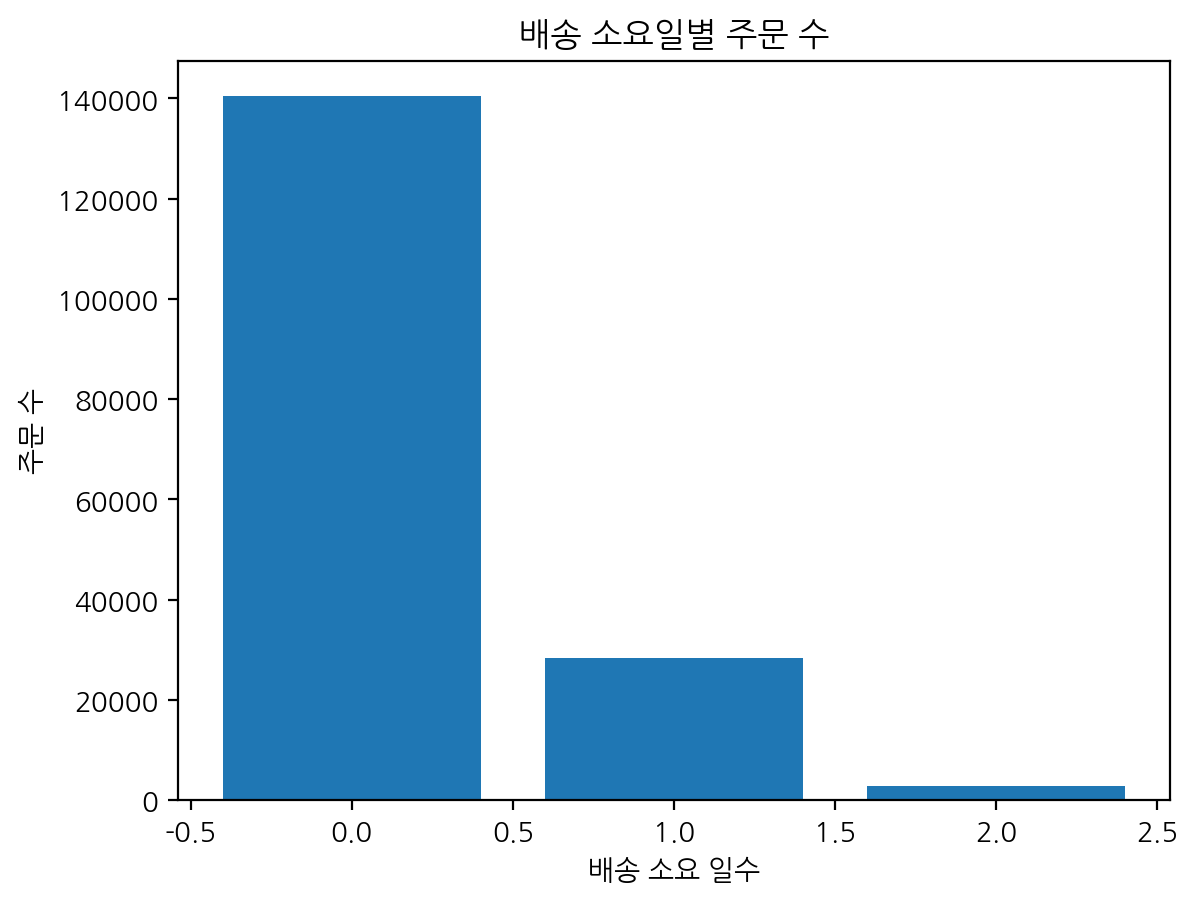

In [ ]:
# 날짜형으로 변환 (필요 시)
df_unique["OrderDT"] = pd.to_datetime(df_unique["OrderDT"])
df_unique["DeliveryDT"] = pd.to_datetime(df_unique["DeliveryDT"])

# 날짜 차이 계산
df_unique["OnTime3"] = (df_unique["DeliveryDT"] - df_unique["OrderDT"]).dt.days

# 결과 시각화
cc = df_unique["OnTime3"].value_counts().sort_index()
plt.bar(x=cc.index, height=cc.values)
plt.xlabel("배송 소요 일수")
plt.ylabel("주문 수")
plt.title("배송 소요일별 주문 수")
plt.show()


In [ ]:
# 날짜형으로 변환 (필요 시)
df_unique["OrderDT"] = pd.to_datetime(df_unique["OrderDT"])
df_unique["DeliveryDT"] = pd.to_datetime(df_unique["DeliveryDT"])

# 날짜 차이 계산
df_unique["OnTime3"] = (df_unique["DeliveryDT"] - df_unique["OrderDT"]).dt.days

# 소요 일수별 주문 수 계산
cc = df_unique["OnTime3"].value_counts().sort_index()

# 표로 보기 좋게 변환
cc_df = cc.reset_index().rename(columns={"index": "배송 소요 일수", "OnTime3": "주문 수"})
print(cc_df)
cc_df

   주문 수   count
0     0  140432
1     1   28309
2     2    2938


,주문 수,count
0,0,140432
1,1,28309
2,2,2938


Month
5     15217
10    14751
3     14713
8     14703
7     14701
1     14538
6     14181
11    14069
12    14016
4     13978
9     13763
2     13049
Name: count, dtype: int64
📊 월별 배송 지연 여부
OnTime4      0    1
Month              
1        13654  884
2        12188  861
3        13802  911
4        13121  857
5        14308  909
6        13313  868
7        13841  860
8        13757  946
9        12844  919
10       13824  927
11       13177  892
12       13052  964


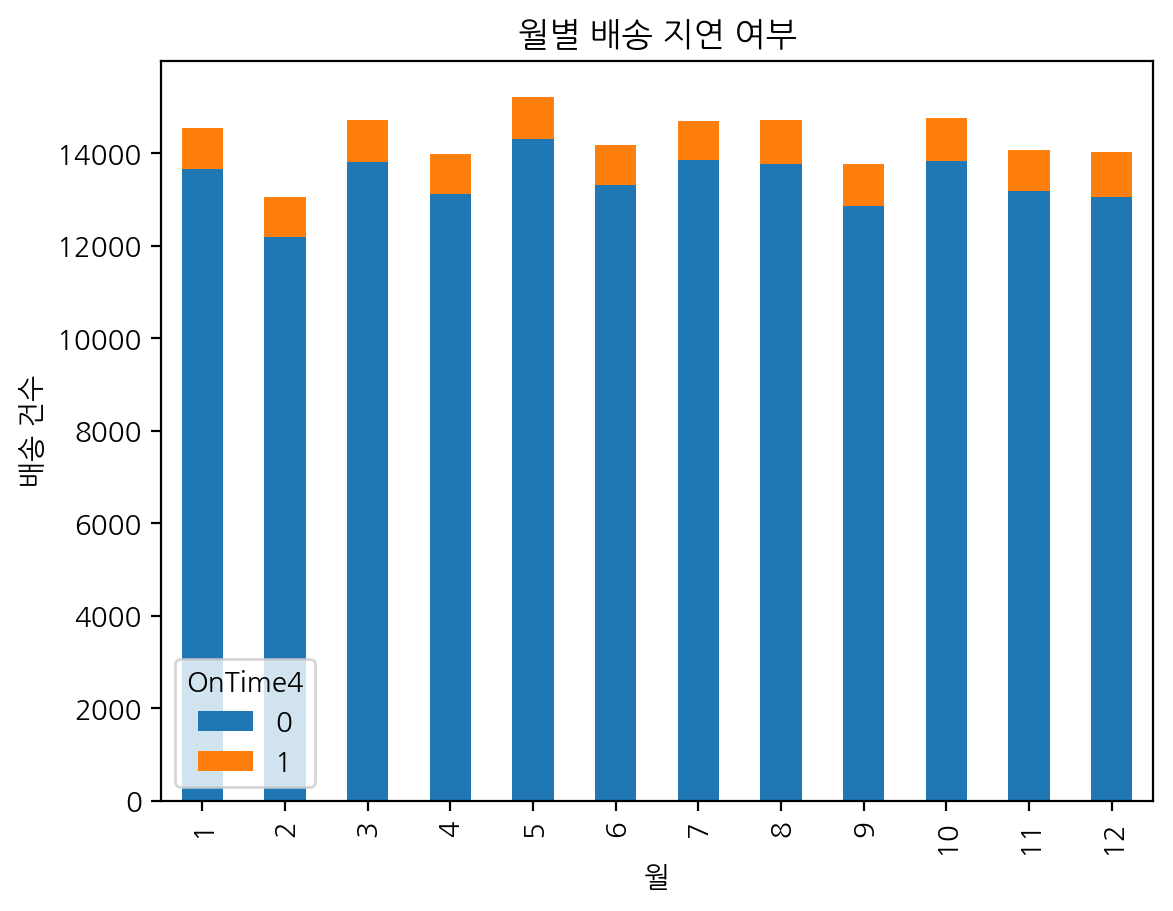

In [ ]:
def check_delivery4(order, delivery):
    # 주문 시간 분리
    order_hour = order.hour

    # 조건 1: 21시 이전 주문
    if order_hour < 21:
        # 다음날 아침 7시까지 도착
        deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=1)
        return 0 if delivery <= deadline else 1

    # 조건 2: 21시 이후 주문
    else:
        # 다다음날 아침 7시까지 도착
        deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=2)
        return 0 if delivery <= deadline else 1

# 22+23+24 1월 합산


# 적용
df_unique["OnTime4"] = df_unique.apply(lambda df_unique: check_delivery4(df_unique["OrderDT"], df_unique["DeliveryDT"]), axis=1)

df_unique["Month"] = df_unique["OrderDT"].dt.month
print(df_unique["Month"].value_counts())
#monthly_delay = df.groupby("Month")["OnTime4"].value_counts().unstack(fill_value=0)
#df["Month_date"] = df.groupby("Month")["OnTime4"].value_counts()

#print(monthly_delay.value_counts())

monthly_delay = df_unique.groupby("Month")["OnTime4"].value_counts().unstack(fill_value=0)

# 결과 확인
print("📊 월별 배송 지연 여부")
print(monthly_delay)

# 그래프 그리기
monthly_delay.plot(kind="bar", stacked=True, title="월별 배송 지연 여부")
plt.xlabel("월")
plt.ylabel("배송 건수")
plt.show()


Year
2024    62550
2023    57491
2022    51638
Name: count, dtype: int64
📊 매년 배송 지연 여부
OnTime5      0     1
Year                
2022     48711  2927
2023     53635  3856
2024     58535  4015


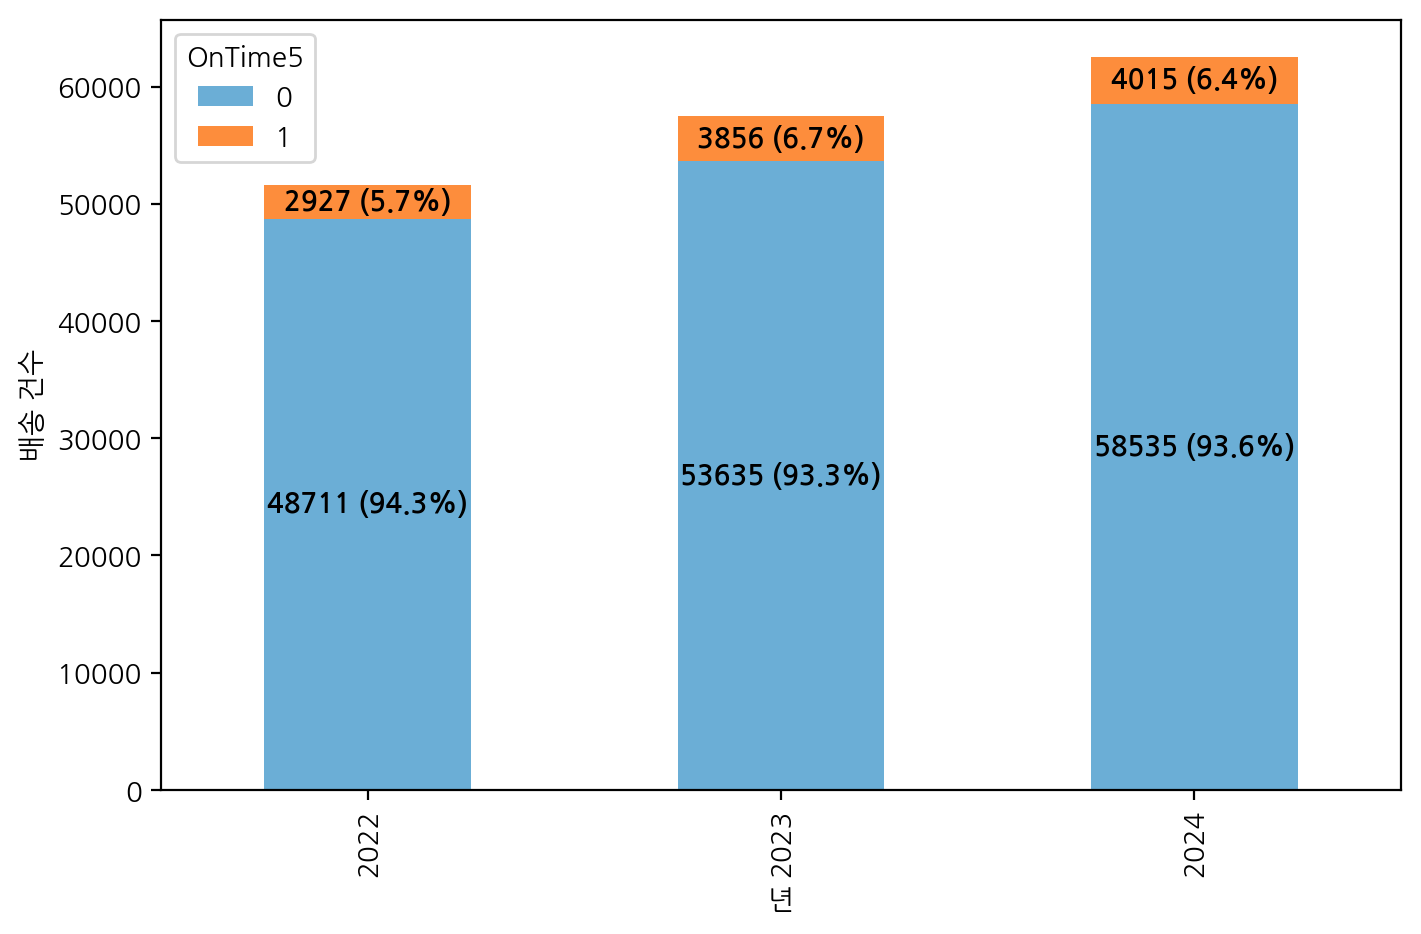

In [ ]:
def check_delivery5(order, delivery):
    # 주문 시간 분리
    order_hour = order.hour

    # 조건 1: 21시 이전 주문
    if order_hour < 21:
        # 다음날 아침 7시까지 도착
        deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=1)
        return 0 if delivery <= deadline else 1

    # 조건 2: 21시 이후 주문
    else:
        # 다다음날 아침 7시까지 도착
        deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=2)
        return 0 if delivery <= deadline else 1


# 적용
df_unique["OnTime5"] = df_unique.apply(lambda df_unique: check_delivery5(df_unique["OrderDT"], df_unique["DeliveryDT"]), axis=1)

df_unique["Year"] = df_unique["OrderDT"].dt.year
print(df_unique["Year"].value_counts())

year_delay = df_unique.groupby("Year")["OnTime5"].value_counts().unstack(fill_value=0)

# 결과 확인
print("📊 매년 배송 지연 여부")
print(year_delay)

yearly_delay_ratio = year_delay.div(year_delay.sum(axis=1), axis=0)
fig, ax = plt.subplots(figsize=(8, 5))
year_delay.plot(kind="bar", stacked=True, ax=ax, color=["#6baed6", "#fd8d3c"])

# 숫자와 비율 표시
for i, (index, row) in enumerate(year_delay.iterrows()):
    total = row.sum()
    for j, value in enumerate(row):
        percentage = value / total * 100
        ax.text(i, row[:j+1].sum() - value/2, f"{value} ({percentage:.1f}%)",
                ha="center", va="center", color="black", fontsize=10, fontweight="bold")

# 그래프 그리기
#year_delay.plot(kind="bar", stacked=True, title="매년 배송 지연 여부")
plt.xlabel("년")
plt.ylabel("배송 건수")
plt.show()


In [ ]:
import pandas as pd

# 열 최대 개수 무제한으로 설정
pd.set_option('display.max_columns', None)

# (선택) 너비도 넉넉하게 설정해서 잘림 방지
pd.set_option('display.width', None)

# (선택) 한 줄에 너무 많은 데이터가 붙지 않게 colwidth도 설정 가능
pd.set_option('display.max_colwidth', None)  # 또는 pd.set_option('display.max_colwidth', -1) (버전별 차이 있음)


In [ ]:
df_unique.columns

Index(['idUser', 'Gender', 'Age', 'AgeGroup', 'FamilyCount', 'MemberYN', 'idOrder', 'OrderDT',
       'OrderMonth', 'OrderDay', 'OrderHour', 'OrderMinute', 'OrderSecond', 'ItemCode',
       'ItemLargeName', 'ItemMiddleName', 'ItemSmallName', 'ItemName', 'Price', 'PriceYear',
       'PriceMin', 'PriceMax', 'DeliveryDT', 'Deli_Year', 'Deli_Month', 'Deli_Day', 'Deli_Hour',
       'Deli_Minute', 'Deli_Second', 'Deli_Duration', 'Deli_Hours', 'IsMorningDelivery', 'OnTime',
       'OnTime2', 'OnTime3', 'OnTime4', 'Month', 'OnTime5', 'Year'],
      dtype='object')

<Figure size 1000x600 with 0 Axes>

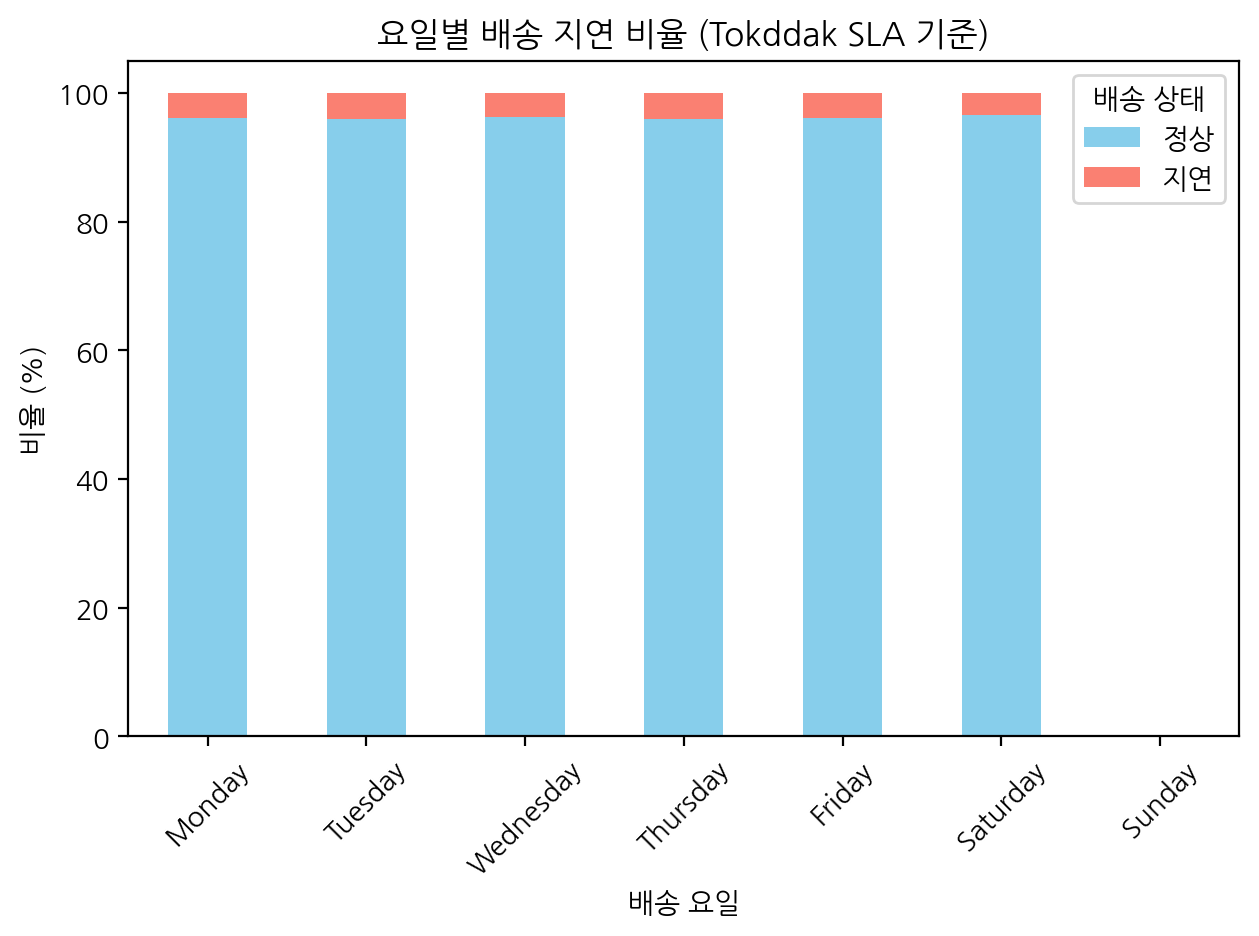

In [ ]:
from datetime import timedelta
import matplotlib.pyplot as plt
import pandas as pd

# 1. 수정된 SLA 기반 배송 지연 판단 함수
from datetime import timedelta

def check_delivery(order, delivery):
    order_hour = order.hour
    order_weekday = order.weekday()  # 월=0, ..., 일=6

    # ✅ 금요일 21시 이후 주문 → 월요일 오전 9시까지 정상
    if order_weekday == 4 and order_hour >= 21:
        deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=3)

    # 일요일 21시 이후 주문 → 화요일 7시까지 정상
    elif order_weekday == 6 and order_hour >= 21:
        deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=2)

    # 토요일 또는 일요일 21시 이전 주문 → 월요일 7시까지 정상
    elif (order_weekday == 5) or (order_weekday == 6 and order_hour < 21):
        if order_weekday == 5:  # 토요일
            deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=2)
        else:  # 일요일 21시 이전
            deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=1)

    # 평일 주문 처리
    else:
        if order_hour < 21:
            deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=1)
        else:
            deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=2)

    return 0 if delivery <= deadline else 1


# 2. 주문 기준 중복 제거
df_unique = df.drop_duplicates(subset="idOrder").copy()

# 3. 요일 및 배송 상태 계산
df_unique["OrderWeekday"] = df_unique["OrderDT"].dt.day_name()
df_unique["DeliveryWeekday"] = df_unique["DeliveryDT"].dt.day_name()
df_unique["OnTime"] = df_unique.apply(lambda row: check_delivery(row["OrderDT"], row["DeliveryDT"]), axis=1)
df_unique["OnTimeYN"] = df_unique["OnTime"].apply(lambda x: "정상" if x == 0 else "지연")

# 4. 요일별 배송 지연 비율 계산 (도착 기준)
delay_by_day = df_unique.groupby("DeliveryWeekday")["OnTimeYN"].value_counts(normalize=True).unstack().fillna(0) * 100
delay_by_day = delay_by_day[["정상", "지연"]]  # 순서 고정
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
delay_by_day = delay_by_day.reindex(order)

# 5. 시각화
plt.figure(figsize=(10, 6))
delay_by_day.plot(kind='bar', stacked=True, color=["skyblue", "salmon"])

plt.title("요일별 배송 지연 비율 (Tokddak SLA 기준)")
plt.xlabel("배송 요일")
plt.ylabel("비율 (%)")
plt.xticks(rotation=45)
plt.legend(title="배송 상태")
plt.tight_layout()
plt.show()


In [ ]:
delay_by_day

OnTimeYN,정상,지연
DeliveryWeekday,,
Monday,96.103318,3.896682
Tuesday,95.867270,4.132730
Wednesday,96.202776,3.797224
Thursday,95.953776,4.046224
Friday,96.045050,3.954950
Saturday,96.643016,3.356984
Sunday,NaN,NaN


In [ ]:
total_delay_rate = (df_unique["OnTimeYN"] == "지연").mean() * 100
print(f"전체 배송 지연율: {total_delay_rate:.2f}%")


전체 배송 지연율: 3.88%


In [ ]:
delay_by_day

OnTimeYN,정상,지연
DeliveryWeekday,,
Monday,96.103318,3.896682
Tuesday,95.867270,4.132730
Wednesday,96.202776,3.797224
Thursday,95.953776,4.046224
Friday,96.045050,3.954950
Saturday,96.643016,3.356984
Sunday,NaN,NaN


<Figure size 1000x600 with 0 Axes>

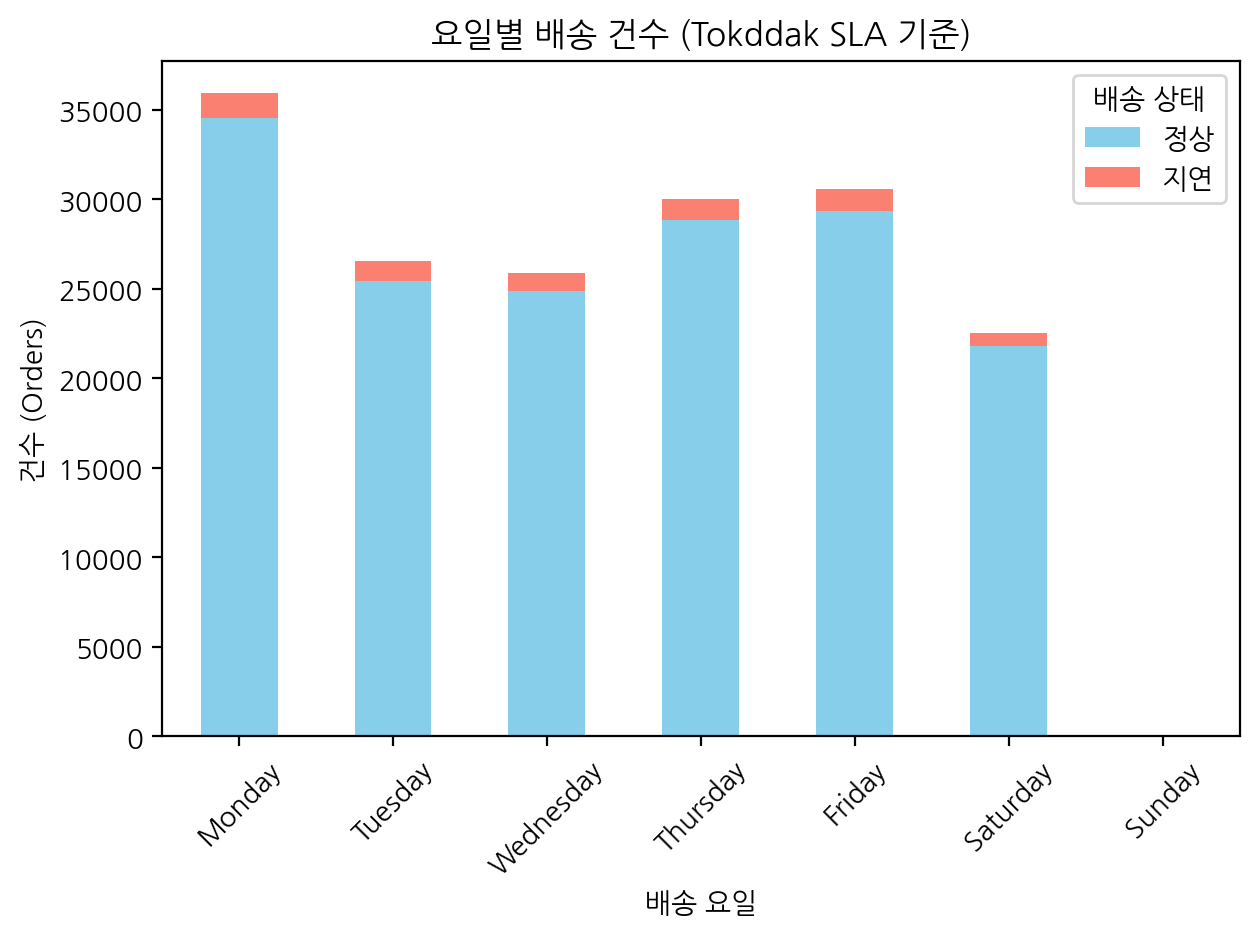

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import timedelta

# [1] SLA 함수는 그대로 사용 (이미 포함됨)

# [2] 주문 기준 중복 제거
df_unique = df.drop_duplicates(subset="idOrder").copy()

# [3] 배송 상태 계산 (OnTime, OnTimeYN)
df_unique["OrderWeekday"] = df_unique["OrderDT"].dt.day_name()
df_unique["DeliveryWeekday"] = df_unique["DeliveryDT"].dt.day_name()
df_unique["OnTime"] = df_unique.apply(lambda row: check_delivery(row["OrderDT"], row["DeliveryDT"]), axis=1)
df_unique["OnTimeYN"] = df_unique["OnTime"].apply(lambda x: "정상" if x == 0 else "지연")

# [4] 요일별 배송 상태 "건수" 집계
delay_by_day_count = df_unique.groupby("DeliveryWeekday")["OnTimeYN"].value_counts().unstack().fillna(0).astype(int)
delay_by_day_count = delay_by_day_count[["정상", "지연"]]  # 순서 고정
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
delay_by_day_count = delay_by_day_count.reindex(order)

# [5] 시각화 (건수 기준)
plt.figure(figsize=(10, 6))
delay_by_day_count.plot(kind='bar', stacked=True, color=["skyblue", "salmon"])

plt.title("요일별 배송 건수 (Tokddak SLA 기준)")
plt.xlabel("배송 요일")
plt.ylabel("건수 (Orders)")
plt.xticks(rotation=45)
plt.legend(title="배송 상태")
plt.tight_layout()
plt.show()


In [ ]:
delay_by_day_count

OnTimeYN,정상,지연
DeliveryWeekday,,
Monday,34528.0,1400.0
Tuesday,25424.0,1096.0
Wednesday,24879.0,982.0
Thursday,28813.0,1215.0
Friday,29336.0,1208.0
Saturday,21793.0,757.0
Sunday,NaN,NaN


In [ ]:
# 요일 추출
df["DeliveryWeekday"] = df["OrderDT"].dt.day_name()

# 요일별 배송 횟수 계산
delivery_counts = df["DeliveryWeekday"].value_counts().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
).fillna(0).astype(int)

# 표 형태로 출력
delivery_df = delivery_counts.reset_index()
delivery_df.columns = ["요일", "배송 횟수"]
print(delivery_df)


          요일   배송 횟수
0     Monday  120151
1    Tuesday  133655
2  Wednesday  155182
3   Thursday  149173
4     Friday  105256
5   Saturday    8045
6     Sunday  185265


In [ ]:
delay_count_by_day = df_unique[df_unique["OnTimeYN"] == "지연"]["DeliveryWeekday"].value_counts().reindex(order, fill_value=0)
print(delay_count_by_day)


DeliveryWeekday
Monday       1400
Tuesday      1096
Wednesday     982
Thursday     1215
Friday       1208
Saturday      757
Sunday          0
Name: count, dtype: int64


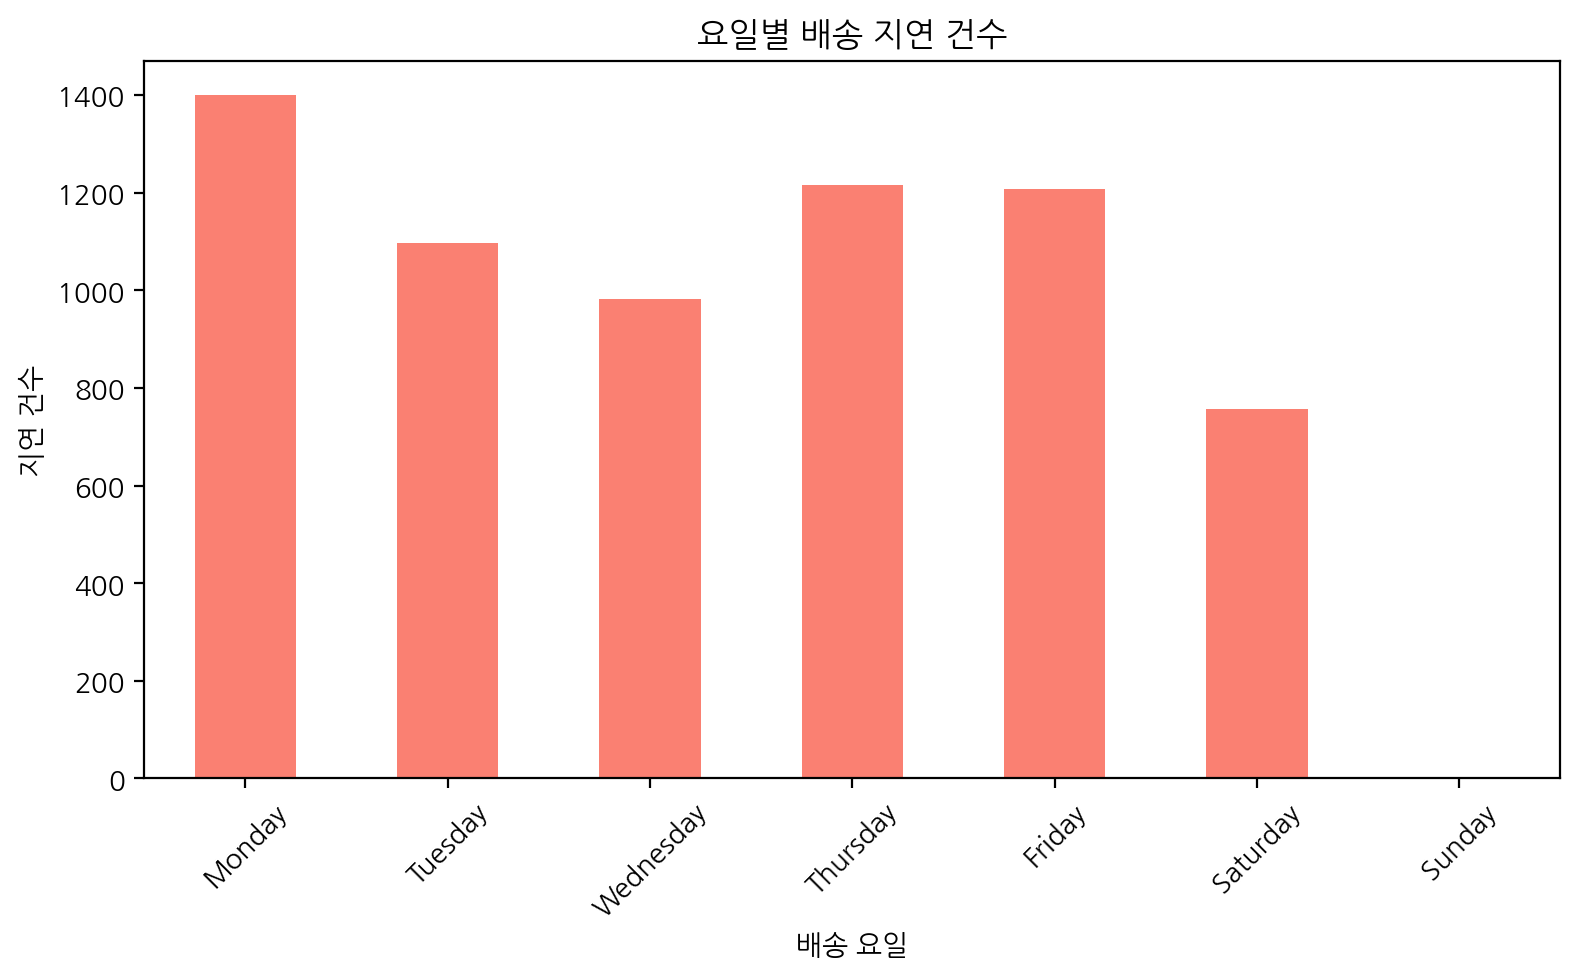

In [ ]:
plt.figure(figsize=(8, 5))
delay_count_by_day.plot(kind="bar", color="salmon")
plt.title("요일별 배송 지연 건수")
plt.xlabel("배송 요일")
plt.ylabel("지연 건수")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


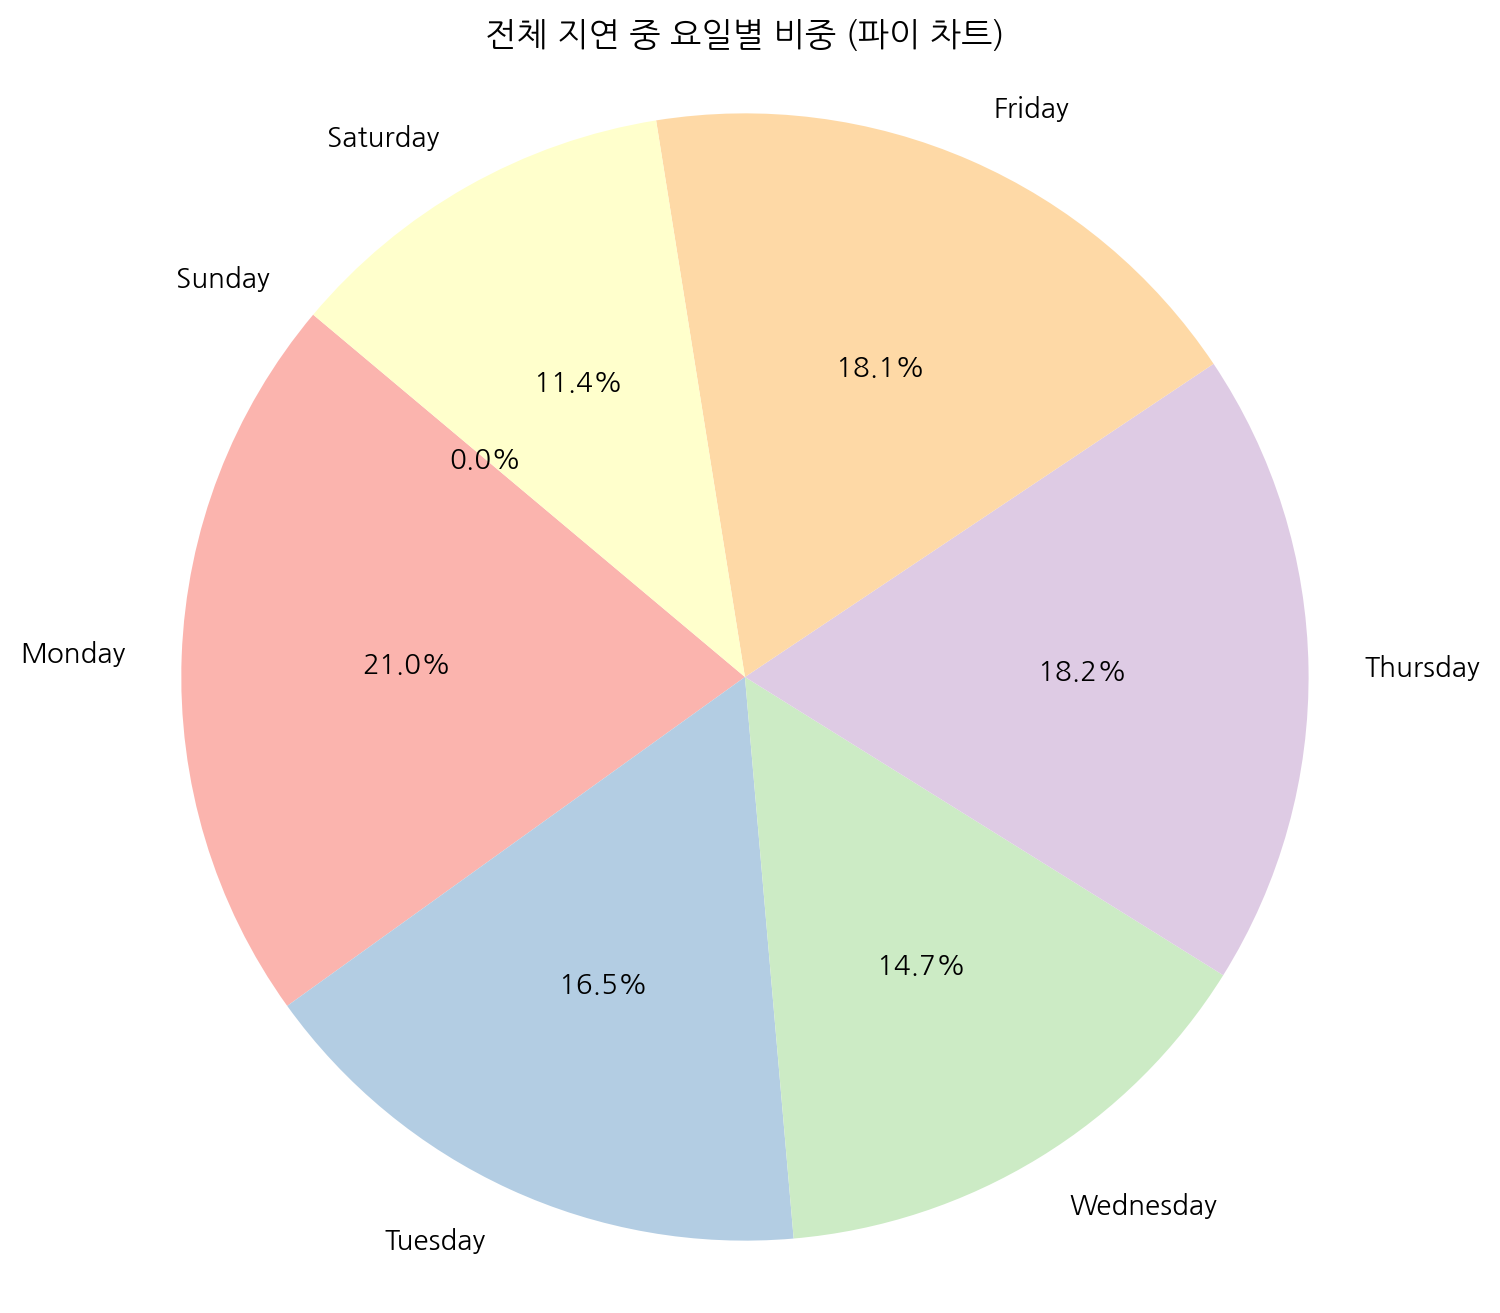

In [ ]:
# 전체 지연 중 요일별 비중 (배송 요일 기준)
delay_share_by_day = df_unique[df_unique["OnTimeYN"] == "지연"]["DeliveryWeekday"].value_counts(normalize=True).reindex(order, fill_value=0) * 100

# 파이 차트 시각화
plt.figure(figsize=(8, 8))
plt.pie(
    delay_share_by_day,
    labels=delay_share_by_day.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=plt.cm.Pastel1.colors
)
plt.title("전체 지연 중 요일별 비중 (파이 차트)")
plt.axis("equal")  # 원형 유지
plt.show()


<Figure size 1000x600 with 0 Axes>

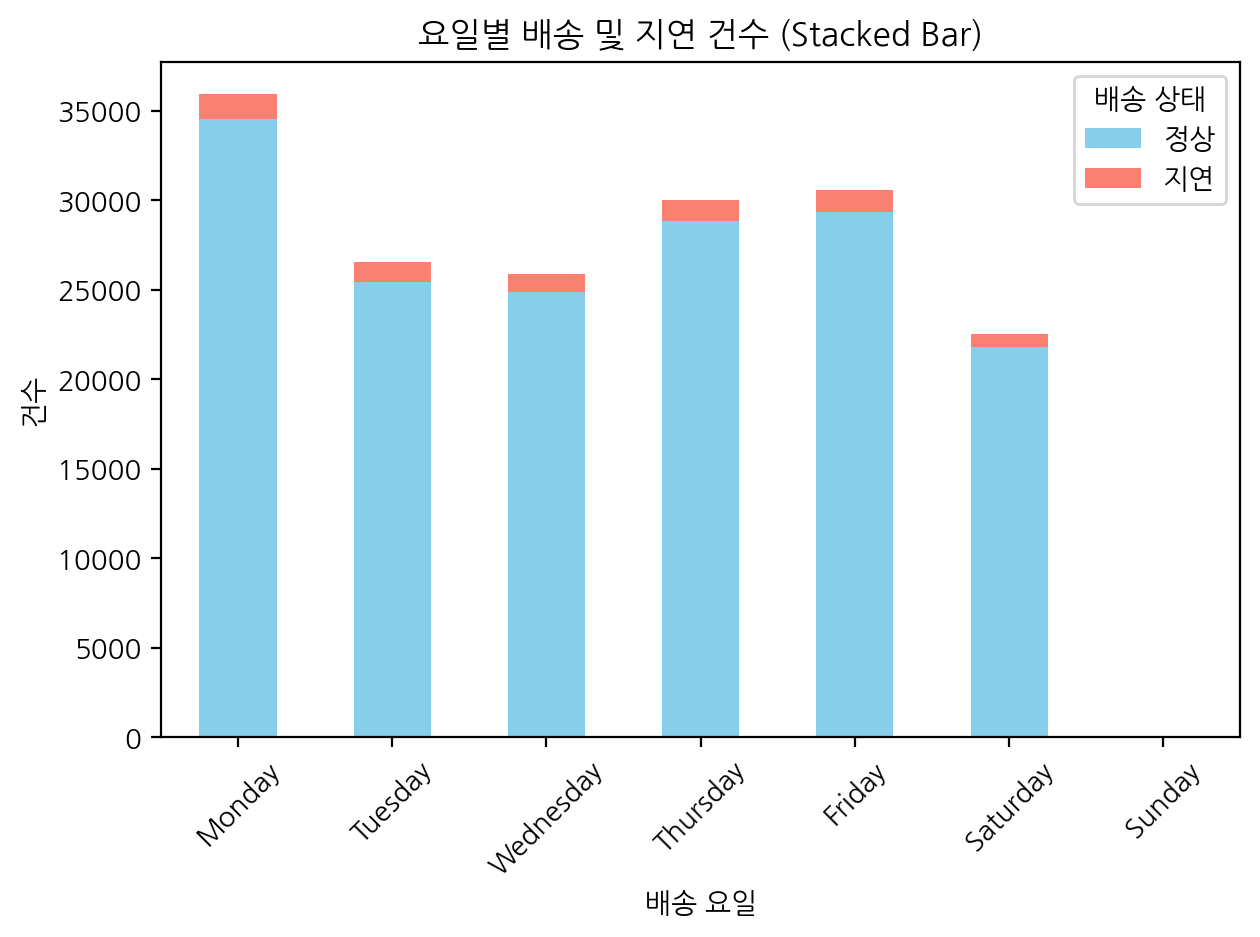

In [ ]:
# 요일 기준 정렬용 리스트
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# 요일별 배송 상태별 건수 집계
status_by_day = df_unique.groupby("DeliveryWeekday")["OnTimeYN"].value_counts().unstack().fillna(0)
status_by_day = status_by_day.reindex(order)

# 시각화
plt.figure(figsize=(10, 6))
status_by_day.plot(kind='bar', stacked=True, color=["skyblue", "salmon"])

# 꾸미기
plt.title("요일별 배송 및 지연 건수 (Stacked Bar)")
plt.xlabel("배송 요일")
plt.ylabel("건수")
plt.xticks(rotation=45)
plt.legend(title="배송 상태")
plt.tight_layout()
plt.show()


In [ ]:
status_by_day

OnTimeYN,정상,지연
DeliveryWeekday,,
Monday,34528.0,1400.0
Tuesday,25424.0,1096.0
Wednesday,24879.0,982.0
Thursday,28813.0,1215.0
Friday,29336.0,1208.0
Saturday,21793.0,757.0
Sunday,NaN,NaN


In [ ]:
df_unique

,idUser,Gender,Age,AgeGroup,FamilyCount,MemberYN,idOrder,OrderDT,OrderMonth,OrderDay,OrderHour,OrderMinute,OrderSecond,ItemCode,ItemLargeName,ItemMiddleName,ItemSmallName,ItemName,Price,PriceYear,PriceMin,PriceMax,DeliveryDT,Deli_Year,Deli_Month,Deli_Day,Deli_Hour,Deli_Minute,Deli_Second,Deli_Duration,Deli_Hours,IsMorningDelivery,OrderDT_date,OrderDT_Formatted,DeliveryDT_date,DeliveryDT_Formatted,OrderWeekday,DeliveryWeekday,OnTime,OnTimeYN
0,U10001,여성,26,20대,2,Y,U10001-O2022-1002,2022-01-06 17:08:00,1,6,17,8,51,L4-M17-S0530-1024,신선식품,수산,전복,완도 활전복 1kg 중 22-25미,33310,2022,33160,37070,2022-01-07 06:24:00,2022,1,7,6,24,0,0 days 13:16:00,13.266667,1,2022-01-06 17:08:00,2022:01:06:17:08:00,2022-01-07 06:24:00,2022:01:07:06:24:00,Thursday,Friday,0,정상
4,U10001,여성,26,20대,2,Y,U10001-O2022-1003,2022-01-13 16:50:00,1,13,16,50,14,L4-M12-S0640-1057,신선식품,과일,토마토,스테비아 방울 토마토 라루 토망고 1kg,11700,2022,11640,13020,2022-01-14 06:28:00,2022,1,14,6,28,0,0 days 13:38:00,13.633333,1,2022-01-13 16:50:00,2022:01:13:16:50:00,2022-01-14 06:28:00,2022:01:14:06:28:00,Thursday,Friday,0,정상
8,U10001,여성,26,20대,2,Y,U10001-O2022-1004,2022-01-20 20:36:00,1,20,20,36,6,L4-M12-S0200-1021,신선식품,과일,딸기,유명산지 딸기 500G(팩),15590,2022,15590,16710,2022-01-21 04:24:00,2022,1,21,4,24,0,0 days 07:48:00,7.800000,1,2022-01-20 20:36:00,2022:01:20:20:36:00,2022-01-21 04:24:00,2022:01:21:04:24:00,Thursday,Friday,0,정상
12,U10001,여성,26,20대,2,Y,U10001-O2022-1005,2022-01-27 21:07:00,1,27,21,7,31,L1-M11-S0340-1017,가공식품,곡물,빵,[리얼]우유식빵 750g,1890,2022,1820,1980,2022-01-29 06:41:00,2022,1,29,6,41,0,1 days 09:34:00,33.566667,0,2022-01-27 21:07:00,2022:01:27:21:07:00,2022-01-29 06:41:00,2022:01:29:06:41:00,Thursday,Saturday,0,정상
19,U10001,여성,26,20대,2,Y,U10001-O2022-1006,2022-02-03 16:59:00,2,3,16,59,31,L1-M19-S0520-1073,가공식품,양념,잼,스머커즈 무설탕 블랙베리 잼 씨드리스 무지방 197778,14150,2022,13710,15490,2022-02-04 06:49:00,2022,2,4,6,49,0,0 days 13:50:00,13.833333,1,2022-02-03 16:59:00,2022:02:03:16:59:00,2022-02-04 06:49:00,2022:02:04:06:49:00,Thursday,Friday,0,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856697,U13000,여성,30,30대,1,N,U13000-O2024-1013,2024-09-16 10:04:00,9,16,10,4,4,L4-M22-S0650-1053,신선식품,채소,파,카프마켓 100% 국내산 잘 익은골파 한입실파김치 매운파 쪽파 김치 맛집,10030,2024,9550,10250,2024-09-17 04:37:00,2024,9,17,4,37,0,0 days 18:33:00,18.550000,1,2024-09-16 10:04:00,2024:09:16:10:04:00,2024-09-17 04:37:00,2024:09:17:04:37:00,Monday,Tuesday,0,정상
856701,U13000,여성,30,30대,1,N,U13000-O2024-1007,2024-09-19 20:42:00,9,19,20,42,33,L4-M22-S0670-1010,신선식품,채소,파프리카,[프레시팜] 노랑 파프리카 특품 3kg 내외,17840,2024,17270,18530,2024-09-20 05:26:00,2024,9,20,5,26,0,0 days 08:44:00,8.733333,1,2024-09-19 20:42:00,2024:09:19:20:42:00,2024-09-20 05:26:00,2024:09:20:05:26:00,Thursday,Friday,0,정상
856710,U13000,여성,30,30대,1,N,U13000-O2024-1014,2024-10-06 22:19:00,10,6,22,19,56,L4-M23-S0920-1021,신선식품,축산,돼지고기,한돈 뒷다리 제육용 600g 냉장,5840,2024,5780,6200,2024-10-08 05:35:00,2024,10,8,5,35,0,1 days 07:16:00,31.266667,0,2024-10-06 22:19:00,2024:10:06:22:19:00,2024-10-08 05:35:00,2024:10:08:05:35:00,Sunday,Tuesday,0,정상
856714,U13000,여성,30,30대,1,N,U13000-O2024-1015,2024-12-08 22:16:00,12,8,22,16,52,L4-M23-S0920-1016,신선식품,축산,돼지고기,제주 1등급 한돈 앞다리 불고기용 300g,7730,2024,7620,8180,2024-12-10 06:12:00,2024,12,10,6,12,0,1 days 07:56:00,31.933333,0,2024-12-08 22:16:00,2024:12:08:22:16:00,2024-12-10 06:12:00,2024:12:10:06:12:00,Sunday,Tuesday,0,정상


import pandas as pd
import matplotlib.pyplot as plt

# 1. 주문별 중복 제거 (이미 SLA 계산되어 있다고 가정)
df_unique = df.drop_duplicates(subset='idOrder').copy()

# 2. 주문 시간 추출
df_unique['OrderHour'] = df_unique['OrderDT'].dt.hour

# 3. 시간대별 주문 건수 계산
hourly_orders = df_unique.groupby('OrderHour')['idOrder'].count().reset_index()
hourly_orders.columns = ['OrderHour', 'OrderCount']

# 4. 시간대별 배송 지연율 계산
hourly_delay = df_unique.groupby('OrderHour')['OnTime'].mean().reset_index()
hourly_delay.columns = ['OrderHour', 'DelayRate']
hourly_delay['DelayRate'] *= 100  # 퍼센트로 변환

# 5. 병합
hourly_stats = pd.merge(hourly_orders, hourly_delay, on='OrderHour')

# 6. 시각화: 주문건수 + 배송지연율 (이중 y축)
fig, ax1 = plt.subplots(figsize=(12, 6))

# 주문건수 막대그래프
ax1.bar(hourly_stats['OrderHour'], hourly_stats['OrderCount'], color='skyblue', alpha=0.7, label='Order Count')
ax1.set_ylabel('Order Count', color='skyblue')
ax1.set_xlabel('Order Hour')
ax1.tick_params(axis='y', labelcolor='skyblue')

# 배송지연율 선그래프 (두 번째 y축)
ax2 = ax1.twinx()
ax2.plot(hourly_stats['OrderHour'], hourly_stats['DelayRate'], color='salmon', marker='o', linewidth=2, label='Delay Rate (%)')
ax2.set_ylabel('Delay Rate (%)', color='salmon')
ax2.tick_params(axis='y', labelcolor='salmon')

# 제목 및 마무리
plt.title("시간대별 주문건수 및 배송지연율 (Tokddak SLA 기준)")
fig.tight_layout()
plt.show()


In [ ]:
print("📋 df_unique 컬럼 목록:")
print(df_unique.columns.tolist())

📋 df_unique 컬럼 목록:
['idUser', 'Gender', 'Age', 'AgeGroup', 'FamilyCount', 'MemberYN', 'idOrder', 'OrderDT', 'OrderMonth', 'OrderDay', 'OrderHour', 'OrderMinute', 'OrderSecond', 'ItemCode', 'ItemLargeName', 'ItemMiddleName', 'ItemSmallName', 'ItemName', 'Price', 'PriceYear', 'PriceMin', 'PriceMax', 'DeliveryDT', 'Deli_Year', 'Deli_Month', 'Deli_Day', 'Deli_Hour', 'Deli_Minute', 'Deli_Second', 'Deli_Duration', 'Deli_Hours', 'IsMorningDelivery', 'OrderDT_date', 'OrderDT_Formatted', 'DeliveryDT_date', 'DeliveryDT_Formatted', 'OrderWeekday', 'DeliveryWeekday', 'OnTime', 'OnTimeYN']


In [ ]:
from datetime import timedelta

# 배송 지연 여부 판단 함수
def check_delivery(order, delivery):
    order_hour = order.hour
    order_weekday = order.weekday()  # 0=월, 6=일

    if order_weekday == 6 and order_hour >= 21:
        deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=2)
    elif (order_weekday == 5) or (order_weekday == 6 and order_hour < 21):
        deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=1 if order_weekday == 6 else 2)
    else:
        if order_hour < 21:
            deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=1)
        else:
            deadline = order.replace(hour=7, minute=0, second=0) + timedelta(days=2)

    return 0 if delivery <= deadline else 1

# SLA 지연 여부 계산
df_unique['OnTime'] = df_unique.apply(lambda row: check_delivery(row['OrderDT'], row['DeliveryDT']), axis=1)


import matplotlib.pyplot as plt

# 주문 시간 추출 (이미 존재하면 생략 가능)
df_unique['OrderHour'] = df_unique['OrderDT'].dt.hour

# 시간대별 주문 수
hourly_orders = df_unique.groupby('OrderHour')['idOrder'].count().reset_index()
hourly_orders.columns = ['OrderHour', 'OrderCount']

# 시간대별 배송 지연율
hourly_delay = df_unique.groupby('OrderHour')['OnTime'].mean().reset_index()
hourly_delay.columns = ['OrderHour', 'DelayRate']
hourly_delay['DelayRate'] *= 100  # 비율 변환

# 병합
hourly_stats = pd.merge(hourly_orders, hourly_delay, on='OrderHour')

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 주문 수 - 막대그래프
ax1.bar(hourly_stats['OrderHour'], hourly_stats['OrderCount'], color='skyblue', alpha=0.7, label='Order Count')
ax1.set_ylabel('Order Count', color='skyblue')
ax1.set_xlabel('Order Hour')
ax1.tick_params(axis='y', labelcolor='skyblue')

# 지연율 - 선그래프
ax2 = ax1.twinx()
ax2.plot(hourly_stats['OrderHour'], hourly_stats['DelayRate'], color='salmon', marker='o', linewidth=2, label='Delay Rate')
ax2.set_ylabel('Delay Rate (%)', color='salmon')
ax2.tick_params(axis='y', labelcolor='salmon')

plt.title("시간대별 주문 수 및 배송 지연율 (Tokddak SLA 기준)")
fig.tight_layout()
plt.show()


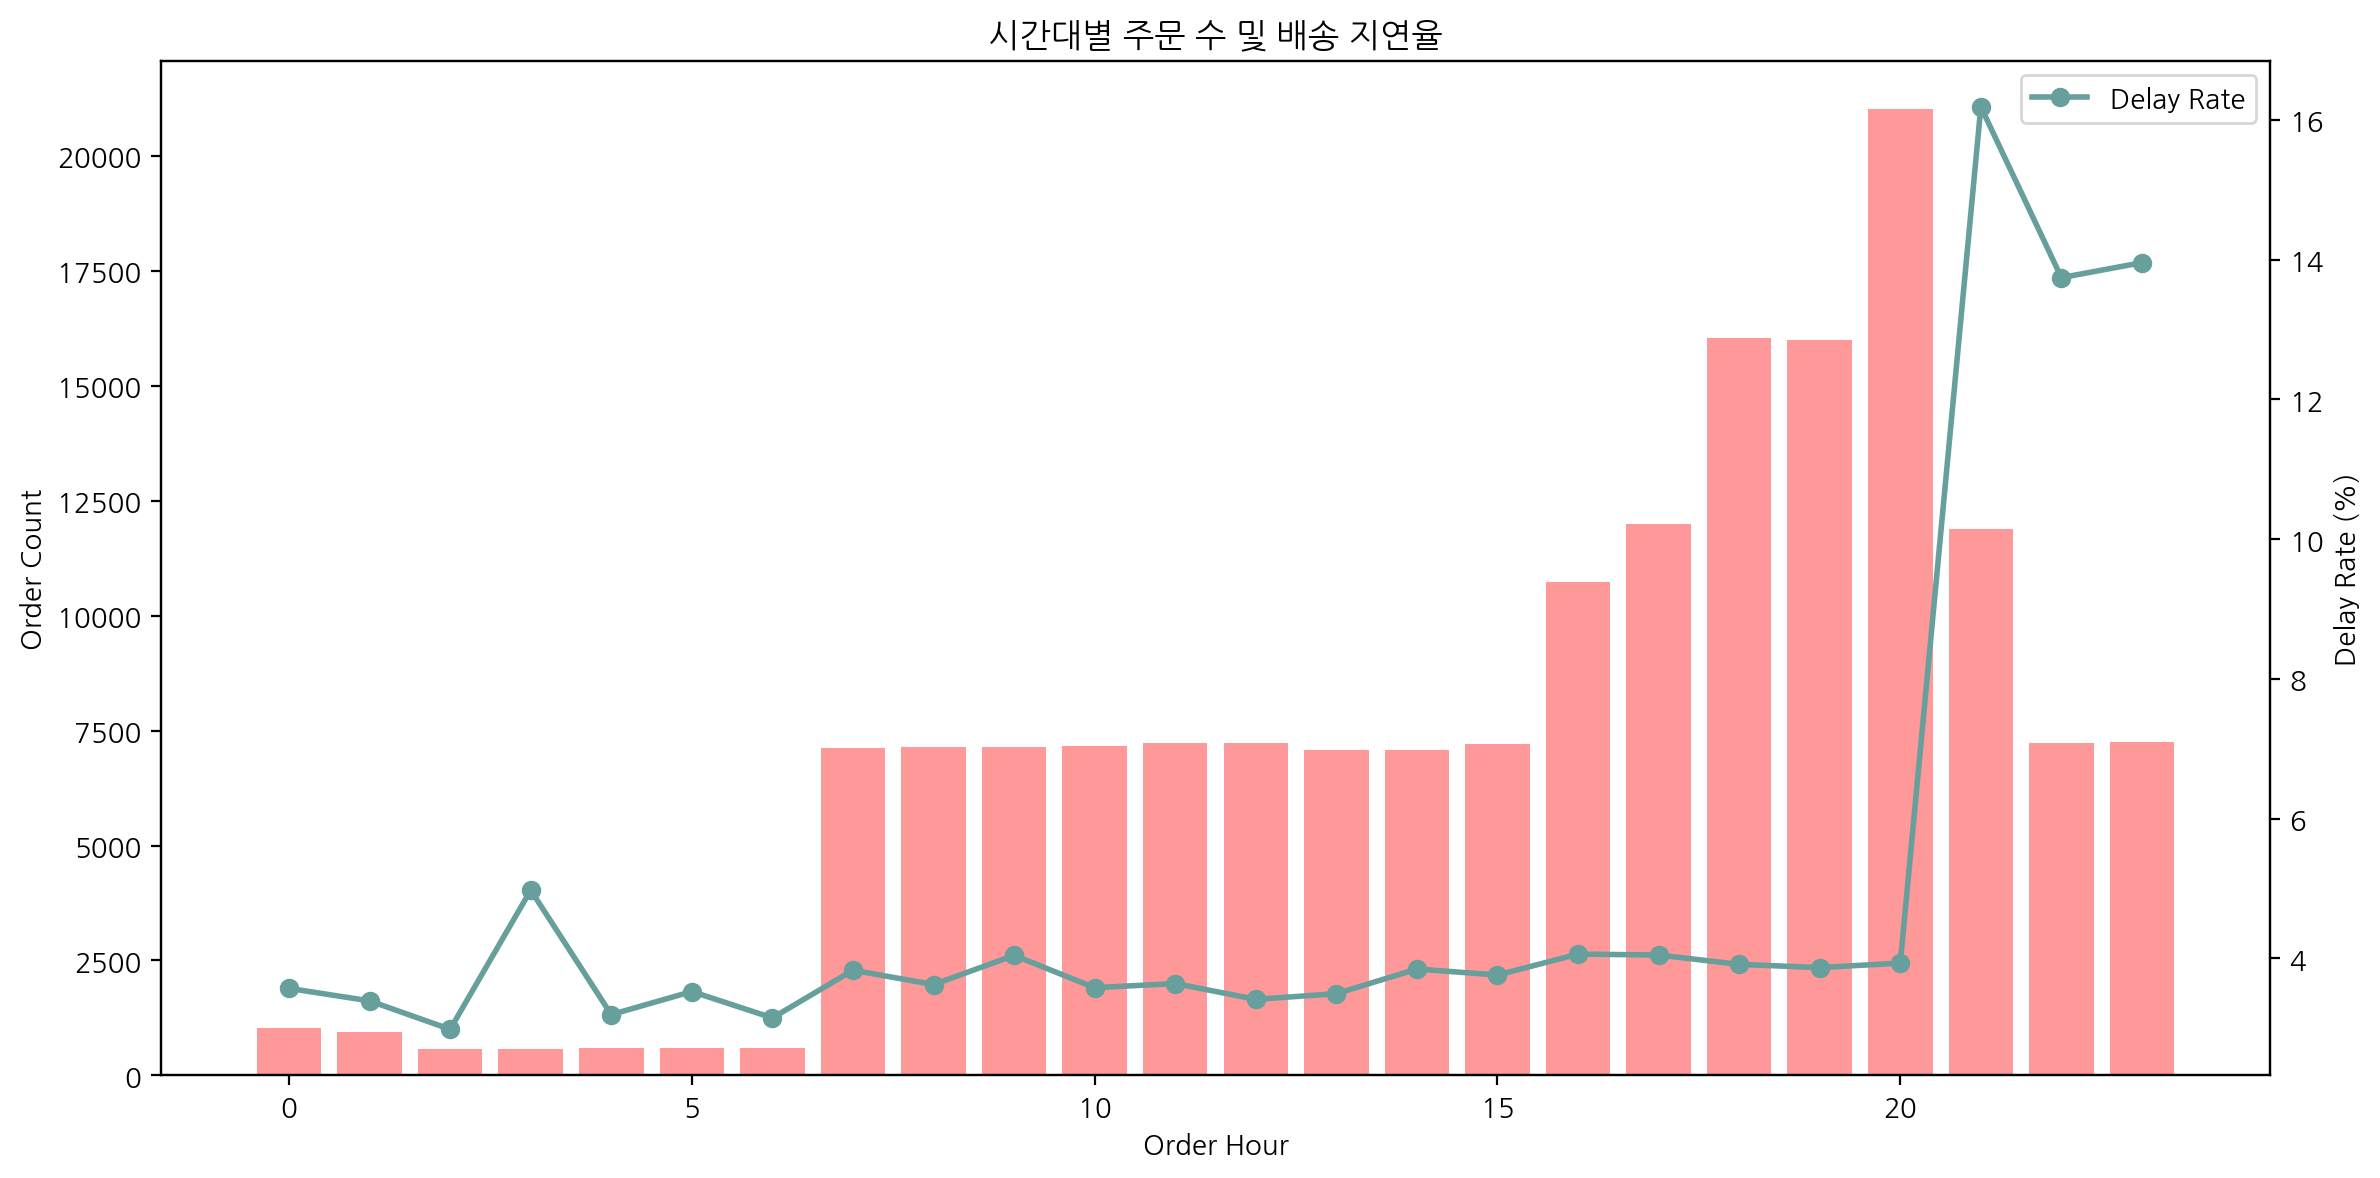

In [ ]:
import matplotlib.pyplot as plt

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 주문 수 - 코랄레드 계열 막대그래프
ax1.bar(hourly_stats['OrderHour'], hourly_stats['OrderCount'],
        color='#ff7f7f', alpha=0.8, label='Order Count')
ax1.set_ylabel('Order Count') #, color='#ff7f7f'
ax1.set_xlabel('Order Hour')
ax1.tick_params(axis='y') #, labelcolor='#ff7f7f'

# 배송 지연율 - 진한 코랄 선그래프
ax2 = ax1.twinx()
ax2.plot(hourly_stats['OrderHour'], hourly_stats['DelayRate'],
         color='#669f9c', marker='o', linewidth=2, label='Delay Rate')
ax2.set_ylabel('Delay Rate (%)') #, color=
ax2.tick_params(axis='y') #, labelcolor='#ff5757'

plt.title("시간대별 주문 수 및 배송 지연율")
plt.legend() #title='뭐넣을게 없네'
fig.tight_layout()
plt.show()


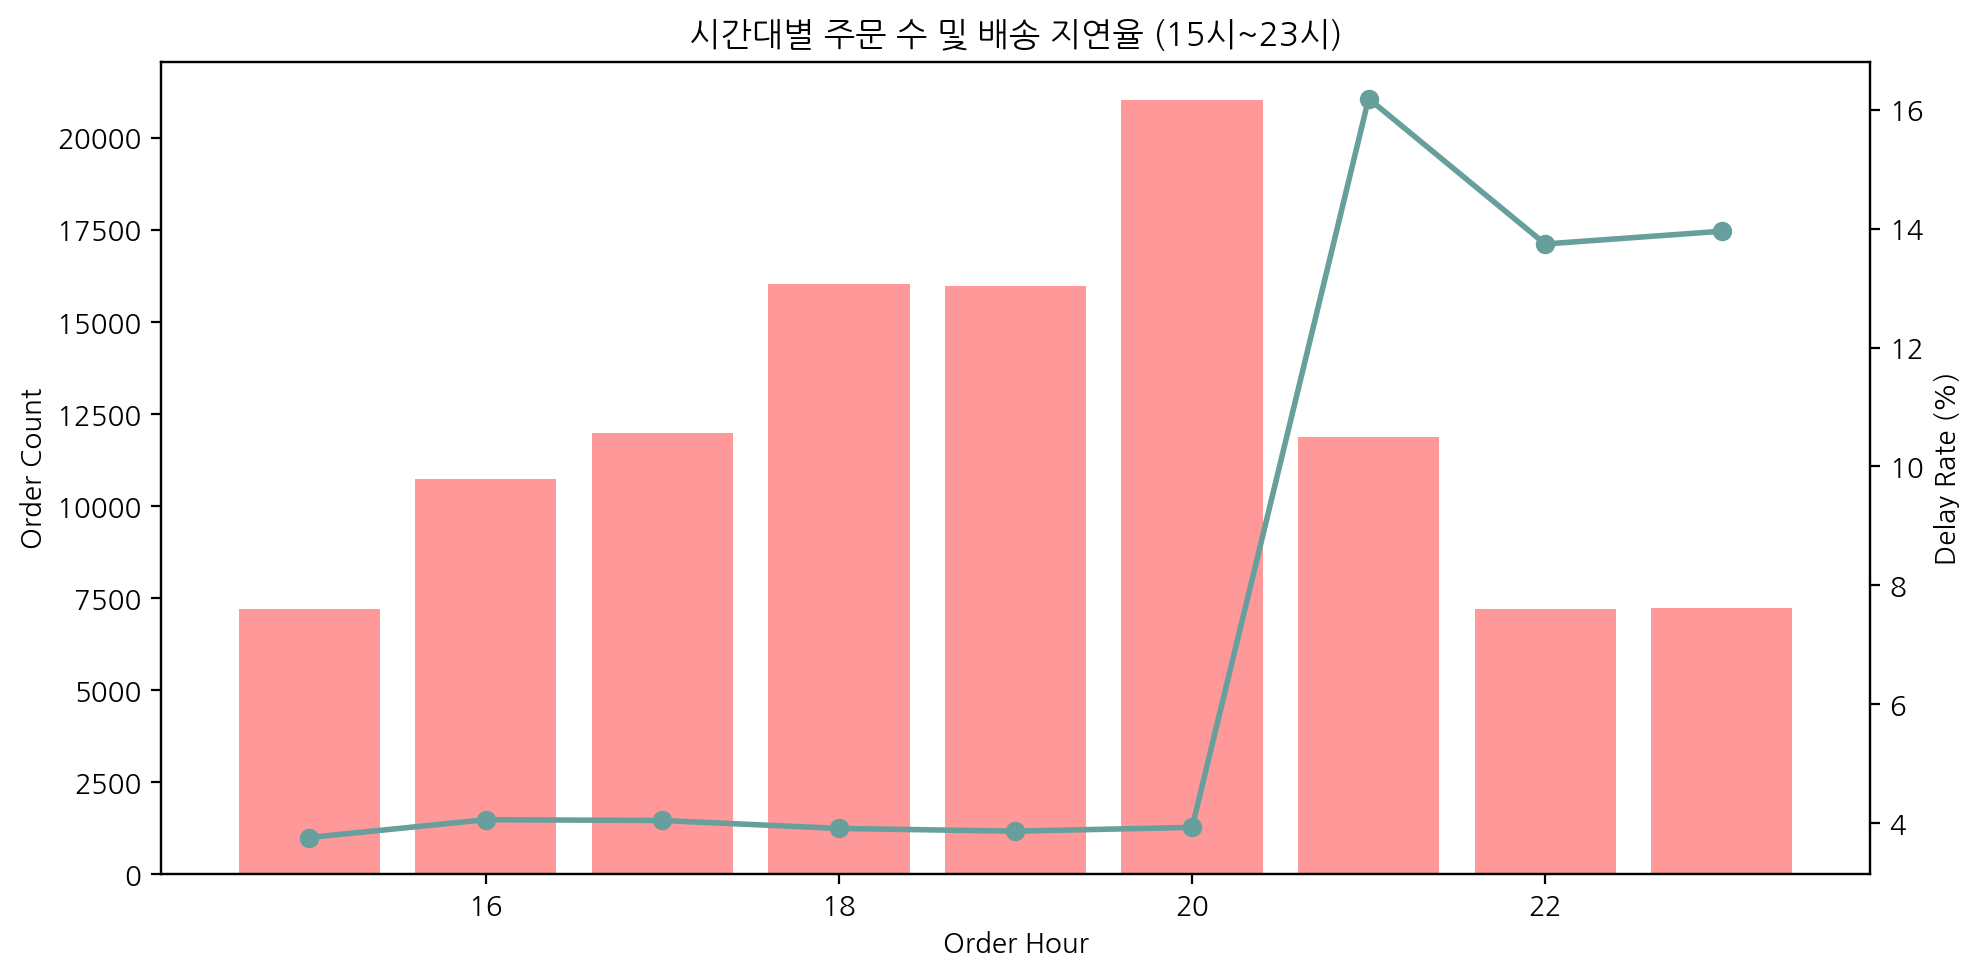

In [ ]:
import matplotlib.pyplot as plt

# ✅ 1. 15시~23시 데이터 필터링
filtered_stats = hourly_stats[hourly_stats['OrderHour'] >= 15]

# ✅ 2. 시각화
fig, ax1 = plt.subplots(figsize=(10, 5))

# 주문 수 - 막대그래프
ax1.bar(filtered_stats['OrderHour'], filtered_stats['OrderCount'],
        color='#ff7f7f', alpha=0.8, label='Order Count')
ax1.set_ylabel('Order Count')
ax1.set_xlabel('Order Hour')
ax1.tick_params(axis='y')

# 배송 지연율 - 선그래프
ax2 = ax1.twinx()
ax2.plot(filtered_stats['OrderHour'], filtered_stats['DelayRate'],
         color='#669f9c', marker='o', linewidth=2, label='Delay Rate')
ax2.set_ylabel('Delay Rate (%)')
ax2.tick_params(axis='y')

plt.title("시간대별 주문 수 및 배송 지연율 (15시~23시)")
fig.tight_layout()
plt.show()


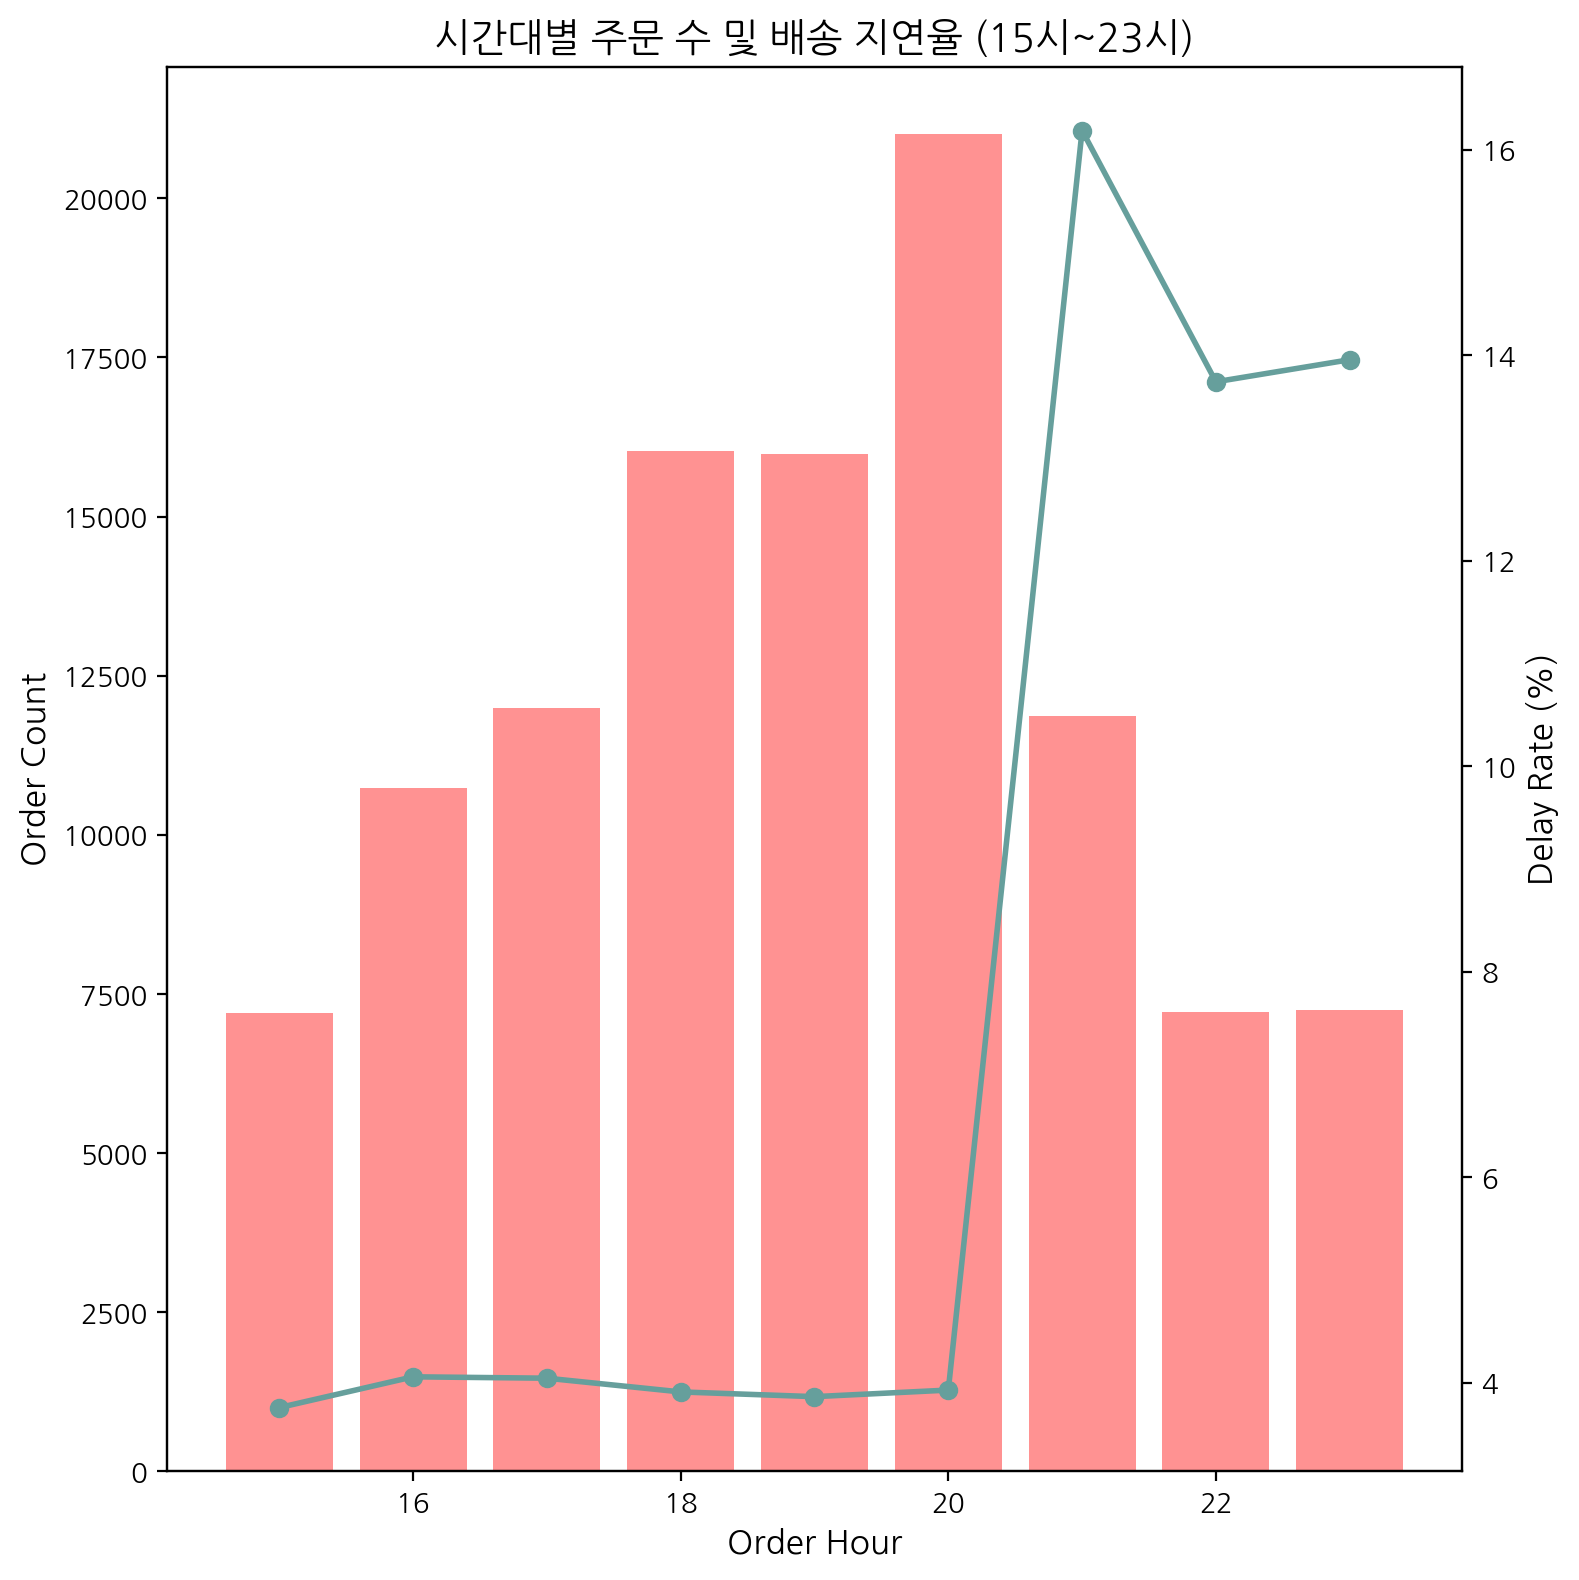

In [ ]:
import matplotlib.pyplot as plt

# 1. 15시~23시 데이터 필터링
filtered_stats = hourly_stats[hourly_stats['OrderHour'] >= 15]

# 2. 시각화 (세로형)
fig, ax1 = plt.subplots(figsize=(8, 8))  # ✅ 세로 길쭉하게

# 주문 수 - 막대그래프 (코랄레드 계열)
ax1.bar(filtered_stats['OrderHour'], filtered_stats['OrderCount'],
        color='#ff7f7f', alpha=0.85)
ax1.set_ylabel('Order Count', fontsize=12)
ax1.set_xlabel('Order Hour', fontsize=12)
ax1.tick_params(axis='y')

# 배송 지연율 - 선그래프 (청록색 계열)
ax2 = ax1.twinx()
ax2.plot(filtered_stats['OrderHour'], filtered_stats['DelayRate'],
         color='#669f9c', marker='o', linewidth=2)
ax2.set_ylabel('Delay Rate (%)', fontsize=12)
ax2.tick_params(axis='y')

# 제목
plt.title("시간대별 주문 수 및 배송 지연율 (15시~23시)", fontsize=14)
fig.tight_layout()
plt.show()


In [1]:
import pandas as pd

# 1. 연도 추출 (OrderDT에서)
df_unique['OrderYear'] = df_unique['OrderDT'].dt.year

# 2. 연도별 배송 지연률 계산
yearly_delay = df_unique.groupby('OrderYear')['OnTime'].mean().reset_index()
yearly_delay.columns = ['Year', 'DelayRate']
yearly_delay['DelayRate'] = (yearly_delay['DelayRate'] * 100).round(2)  # 퍼센트 변환

# 3. 출력
print("📊 연도별 배송 지연률 (%)")
print(yearly_delay)


NameError: name 'df_unique' is not defined

In [ ]:

# 데이터 불러오기
#df_clean = pd.read_csv('./data/df_clean.csv', parse_dates=['OrderDT', 'DeliveryDT'])

#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns

# 1. 연도 추출
df_clean['Year'] = pd.to_datetime(df_clean['OrderDT']).dt.year

# 2. 사용자별 연간 총 매출 + 멤버십 정보
user_year_sales = df_clean.groupby(['idUser', 'Year']).agg({
    'Price': 'sum',
    'MemberYN': 'first'
}).reset_index()

# 3. 멤버십 여부 + 연도별 평균 매출 계산
avg_sales_by_member = user_year_sales.groupby(['MemberYN', 'Year'])['Price'].mean().reset_index()
avg_sales_by_member.columns = ['MemberYN', 'Year', 'AvgSales']

# 4. 시각화
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_sales_by_member, x='Year', y='AvgSales', hue='MemberYN',
         palette={'Y': '#ff7f7f', 'N': '#669f9c'})

plt.title('Annual Average Sales per Customer by Membership')
plt.xlabel('Year')
plt.ylabel('Avg Sales per Customer (₩)')
plt.legend(title='Membership')
plt.tight_layout()
plt.show()


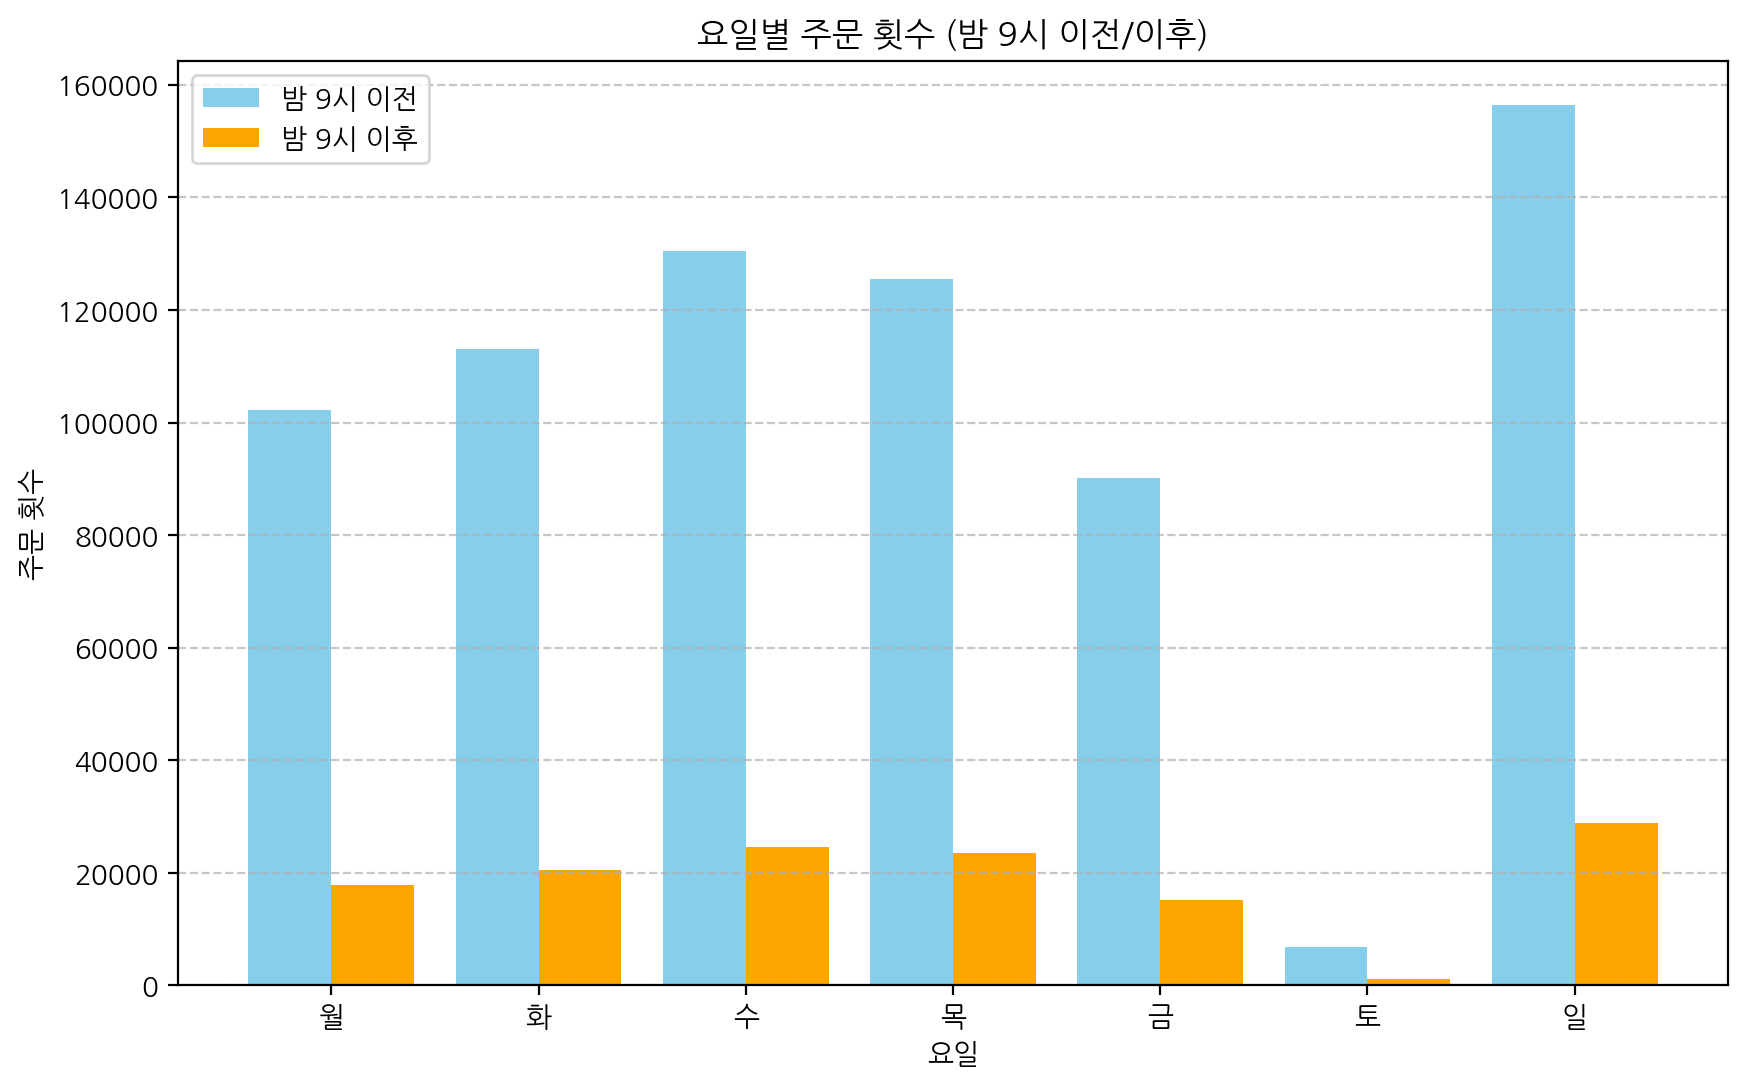

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: 밤 9시 이전/이후 주문 여부 컬럼 추가
df['OrderHour'] = df['OrderDT'].dt.hour
df['TimePeriod'] = df['OrderHour'].apply(lambda x: '전' if x < 21 else '후')

# Step 2: 요일 컬럼 추가
df['Weekday'] = df['OrderDT'].dt.day_name()

# Step 3: 요일과 시간대를 결합하여 새로운 컬럼 생성
df['WeekdayTime'] = df['Weekday'] + " " + df['TimePeriod']

# Step 4: 요일 순서를 월요일부터 일요일로 지정
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Step 5: 요일과 시간대별 배송 횟수 집계
weekday_counts = df.groupby(['Weekday', 'TimePeriod']).size().unstack(fill_value=0).reindex(weekday_order)

# Step 6: 막대 그래프 그리기
plt.figure(figsize=(10, 6))

# x축 인덱스
x = range(len(weekday_order))

# 막대 너비
bar_width = 0.4

# 막대 그래프 그리기
plt.bar([i - bar_width / 2 for i in x], weekday_counts['전'], width=bar_width, label='밤 9시 이전', color='skyblue')
plt.bar([i + bar_width / 2 for i in x], weekday_counts['후'], width=bar_width, label='밤 9시 이후', color='orange')

# 그래프 설정
plt.title('요일별 주문 횟수 (밤 9시 이전/이후)')
plt.xlabel('요일')
plt.ylabel('주문 횟수')
plt.xticks(x, ['월', '화', '수', '목', '금', '토', '일'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 출력
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: 밤 9시 이전/이후 주문 여부 컬럼 추가
df['OrderYear'] = df['OrderDT'].dt.hour

# Step 2: 요일 컬럼 추가
df['Weekday'] = df['OrderDT'].dt.day_name()

# Step 3: 요일과 시간대를 결합하여 새로운 컬럼 생성
df['WeekdayTime'] = df['Weekday'] + " " + df['TimePeriod']

# Step 4: 요일 순서를 월요일부터 일요일로 지정
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Step 5: 요일과 시간대별 배송 횟수 집계
weekday_counts = df.groupby(['Weekday', 'TimePeriod']).size().unstack(fill_value=0).reindex(weekday_order)

# Step 6: 막대 그래프 그리기
plt.figure(figsize=(10, 6))

# x축 인덱스
x = range(len(weekday_order))

# 막대 너비
bar_width = 0.4

# 막대 그래프 그리기
plt.bar([i - bar_width / 2 for i in x], weekday_counts['전'], width=bar_width, label='밤 9시 이전', color='skyblue')
plt.bar([i + bar_width / 2 for i in x], weekday_counts['후'], width=bar_width, label='밤 9시 이후', color='orange')

# 그래프 설정
plt.title('요일별 주문 횟수 (밤 9시 이전/이후)')
plt.xlabel('요일')
plt.ylabel('주문 횟수')
plt.xticks(x, ['월', '화', '수', '목', '금', '토', '일'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 출력
plt.show()
